In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import albumentations as A
import torchvision
import torch

from albumentations.pytorch.transforms import ToTensorV2
from torchvision.models.detection import FasterRCNN
from torch.utils.data import Dataset, DataLoader
from typing import Any

In [4]:
LABELS = ['smoke', 'fire']
NUM_OF_CLASSES = len(LABELS)+1

SAVE_PATH = '/content/drive/MyDrive/Skola/py-AI/wildfire/test_obj/models/'
MODEL_NAME = 'model_new.pt'

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=NUM_OF_CLASSES)
IN_FEATURES = model.roi_heads.box_predictor.cls_score.in_features

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [6]:
model.load_state_dict(torch.load(SAVE_PATH + MODEL_NAME))
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [7]:
def get_relevant_scores(threshold: float, labels: list, scores: list, boxes: list) -> tuple:
    """
    Get score over a set lower accuracy limit
    :param labels: list; predicted labels
    :param scores: list; predicted accuracy scores
    :param boxes: list; predicted bounding boxes
    :return: tuple[list, list, list];
    """
    x = len([score for score in scores if score >= threshold])
    return labels[:x], scores[:x], boxes[:x]

In [8]:
from PIL import Image

def predict(model, img_path: str, threshold: float) -> tuple:
    img = Image.open(img_path)
    pred_img = transform(img)
    pred_img = pred_img.view(1, 3, pred_img.shape[1], pred_img.shape[2])

    preds = model(pred_img)
    outputs = [{k: v.to(torch.device('cpu')) for k, v in target.items()} for target in preds]

    boxes = outputs[0]['boxes'].data.cpu().numpy().astype(np.int32)
    scores = outputs[0]['scores'].data.cpu().numpy()
    labels = outputs[0]['labels'].data.cpu().numpy().astype(np.int32)

    boxes, scores, labels = get_relevant_scores(threshold, boxes, scores, labels)
    
    return boxes, scores, labels

In [38]:
transform = transforms.Compose([transforms.ToTensor()])
IMG_PATH = '/content/drive/MyDrive/Skola/py-AI/wildfire/test_obj/test/fire-922.jpg'

In [41]:
predictions = predict(model, IMG_PATH, 0.0)

In [22]:
predictions[0]

array([[491, 402, 565, 461]], dtype=int32)

In [12]:
predictions[1]

array([], dtype=float32)

In [13]:
predictions[2]

array([], dtype=int32)

In [46]:
COLORS = [
    '#d90166',
    '#8f00f1',
    '#d0ff14',
    '#eb5030',
    '#ff000d',
    '#66ff00',
    '#0203e2',
    '#04d9ff',
    '#ff00ff',
    '#fffd01',
    '#e56024',
    '#dfff4f',
    '#ff3503',
    '#6600ff',
    '#f7b718',
    '#fe0002',
    '#45cea2',
    '#ff85ff',
    '#1974d2',
    '#fe6700',
    '#d90166',
    '#8f00f1',
    '#d0ff14',
    '#eb5030',
    '#ff000d',
    '#66ff00',
    '#0203e2',
    '#04d9ff',
    '#ff00ff',
    '#fffd01',
    '#e56024',
    '#dfff4f',
    '#ff3503',
    '#6600ff',
    '#f7b718',
    '#fe0002',
    '#45cea2',
    '#ff85ff',
    '#1974d2',
    '#fe6700',
    '#d90166',
    '#8f00f1',
    '#d0ff14',
    '#eb5030',
    '#ff000d',
    '#66ff00',
    '#0203e2',
    '#04d9ff',
    '#ff00ff',
    '#fffd01',
    '#e56024',
    '#dfff4f',
    '#ff3503',
    '#6600ff',
    '#f7b718',
    '#fe0002',
    '#45cea2',
    '#ff85ff',
    '#1974d2',
    '#fe6700',
    '#d90166',
    '#8f00f1',
    '#d0ff14',
    '#eb5030',
    '#ff000d',
    '#66ff00',
    '#0203e2',
    '#04d9ff',
    '#ff00ff',
    '#fffd01',
    '#e56024',
    '#dfff4f',
    '#ff3503',
    '#6600ff',
    '#f7b718',
    '#fe0002',
    '#45cea2',
    '#ff85ff',
    '#1974d2',
    '#fe6700',
]

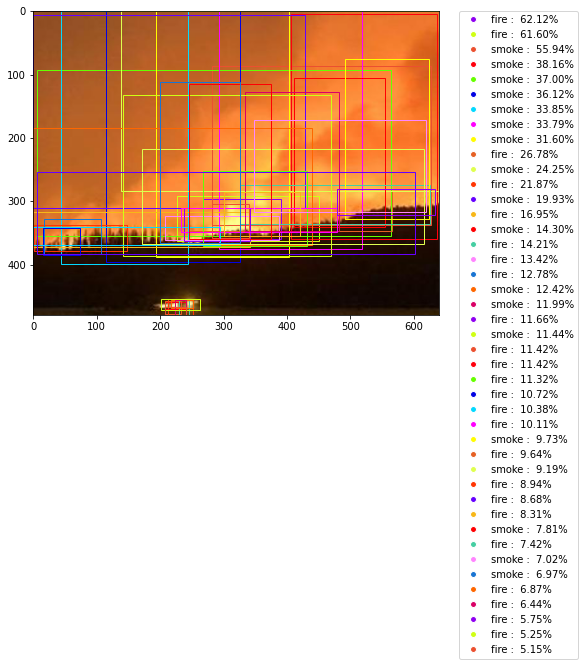

In [47]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

img = Image.open(IMG_PATH)
patches = []
fig, ax = plt.subplots(figsize=(13,7))
plt.imshow(img)
box_counter = 0
for box, score, label in zip(predictions[0], predictions[1], predictions[2]):
    box_counter += 1
    score *= 100
    label = f'{str(LABELS[label-1])} : {score: .2f}%'

    x_min = int(box[0])
    y_min = int(box[1])
    x_max = int(box[2])
    y_max = int(box[3])

    plt.gca().add_patch(Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        edgecolor=COLORS[box_counter],
        facecolor=None,
        fill=False,
        lw=1
    ))

    patch = Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor=COLORS[box_counter],
        label=label
    )
    patches.append(patch)
  
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    handles=[patch for patch in patches]
)

plt.show()

In [45]:


def show(image: Image, boxes: list, scores: list, labels: list) -> None:
    """
    Plot and show the image with the models predicted bounding boxes and labels
    :param image: PIL image obj; input image
    :param labels: list; predicted labels
    :param boxes: list; predicted bounding boxes
    :param scores: list; prediction scores
    :return: None
    """
    from matplotlib.patches import Rectangle
    from matplotlib.lines import Line2D

    patches = []
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.imshow(image)

    for i in range(len(boxes)):
        label = f'{str(labels[i])} - {str(scores[i])}%'

        x_min = int(boxes[i][0])
        y_min = int(boxes[i][1])
        x_max = int(boxes[i][2])
        y_max = int(boxes[i][3])

        plt.gca().add_patch(Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            edgecolor=COLORS[i],
            facecolor=None,
            fill=False,
            lw=1
        ))

        patch = Line2D(
            [0], [0],
            marker='o',
            color='w',
            markerfacecolor=COLORS[i],
            label=label
        )
        patches.append(patch)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.,
        handles=[patch for patch in patches]
    )
    return ax
    #plt.show()

In [18]:
from PIL import ImageDraw

w, h = 220, 110
shape = [(40,40), (w-10, h-10)]

_img = Image.new('RGB', (w,h))

img = ImageDraw.Draw(_img)
img.rectangle(shape, outline='red')
_img.show()

In [19]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

source_img = Image.open(IMG_PATH).convert("RGB")

draw = ImageDraw.Draw(source_img)
draw.rectangle(((0, 00), (100, 100)), fill="black")

source_img.save('test_img.jpg', "JPEG")

In [ ]:
new_img = show(img, predictions[0], predictions[1], predictions[2])
new_img